<a href="https://colab.research.google.com/github/ShashankDhulipala/Clustering/blob/main/Customer%20segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import pandas as pd
import numpy as np

In [298]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Mall_Customers.csv")

In [299]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [302]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans



In [304]:
px.bar(df,x="Age",y="Annual Income (k$)",color="Gender")

Text(0, 0.5, 'Annual Income (k$)')

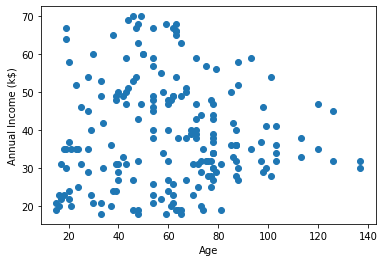

In [305]:
plt.scatter(df['Annual Income (k$)'],df['Age'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')


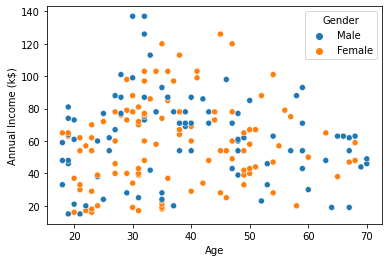

In [306]:
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df)

In [307]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [308]:
y_pred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [309]:
df['cluster']=y_pred

In [310]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


In [311]:
km.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333]])

In [312]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]


In [313]:
km.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333]])

In [314]:
km.cluster_centers_[:,0]

array([43.08860759, 45.2173913 , 32.69230769, 25.52173913, 40.66666667])

In [318]:
km.cluster_centers_[:,1]
km.cluster_centers_[:,2]



array([49.56962025, 20.91304348, 82.12820513, 78.56521739, 17.58333333])

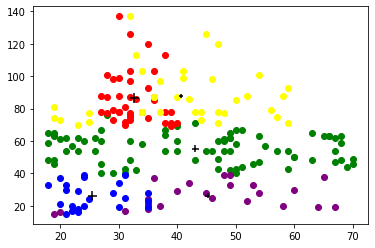

In [319]:
plt.scatter(df1['Age'],df1['Annual Income (k$)'],color='green')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],color='purple')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],color='red')
plt.scatter(df4['Age'],df4['Annual Income (k$)'],color='blue')
plt.scatter(df5['Age'],df5['Annual Income (k$)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],color='black',marker='+')

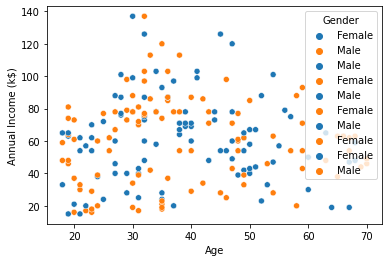

In [320]:
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df1)
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df2)
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df3)

sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df4)

sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df5)







In [321]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:
scaler=MinMaxScaler()

In [324]:
scaler.fit(df[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [325]:
df["SAge"]=scaler.transform(df[["Age"]])

In [326]:
scaler.fit(df[["Annual Income (k$)"]])
df["Sincome"]=scaler.transform(df[["Annual Income (k$)"]])

In [327]:
scaler.fit(df[['Spending Score (1-100)']])
df["Sspending"]=scaler.transform(df[["Spending Score (1-100)"]])

In [332]:
km2=KMeans(n_clusters=5)
km2.fit(df[['SAge','Sincome','Sspending']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [333]:
df['clsuter1']=km2.predict(df[['SAge','Sincome','Sspending']])

In [334]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,SAge,Sincome,Sspending,clsuter1
0,1,Male,19,15,39,1,0.019231,0.000000,0.387755,0
1,2,Male,21,15,81,3,0.057692,0.000000,0.816327,3
2,3,Female,20,16,6,1,0.038462,0.008197,0.051020,0
3,4,Female,23,16,77,3,0.096154,0.008197,0.775510,3
4,5,Female,31,17,40,1,0.250000,0.016393,0.397959,0
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0.326923,0.860656,0.795918,2
196,197,Female,45,126,28,4,0.519231,0.909836,0.275510,4
197,198,Male,32,126,74,2,0.269231,0.909836,0.744898,2
198,199,Male,32,137,18,4,0.269231,1.000000,0.173469,4


In [335]:
km2.cluster_centers_

array([[0.17425432, 0.30311141, 0.40857976],
       [0.72214854, 0.27444884, 0.41608023],
       [0.28605769, 0.58278689, 0.82168367],
       [0.14464883, 0.09265859, 0.79148181],
       [0.5       , 0.61584699, 0.17278912]])

In [338]:
df6=df[df.cluster==0]
df7=df[df.cluster==1]
df8=df[df.cluster==2]
df9=df[df.cluster==3]
df10=df[df.cluster==4]




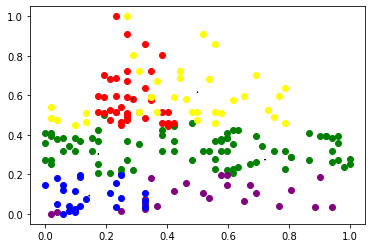

In [339]:
plt.scatter(df6['SAge'],df6['Sincome'],color='green')
plt.scatter(df7['SAge'],df7['Sincome'],color='purple')
plt.scatter(df8['SAge'],df8['Sincome'],color='red')
plt.scatter(df9['SAge'],df9['Sincome'],color='blue')
plt.scatter(df10['SAge'],df10['Sincome'],color='yellow')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],km2.cluster_centers_[:,2],color='black',label='centroid',marker='*')

In [340]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster', 'SAge', 'Sincome', 'Sspending',
       'clsuter1'],
      dtype='object')

In [342]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km3 = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

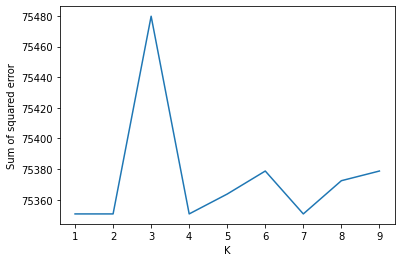

In [343]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [344]:
sse

[75350.77917248776,
 75350.77917248776,
 75479.76429338777,
 75350.77917248776,
 75363.74835182933,
 75378.76464074483,
 75350.77917248776,
 75372.4523788002,
 75378.76464074483]